In [72]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster import hierarchy as shc
from sklearn.preprocessing import StandardScaler, OneHotEncoder

<h3>Reading data</h3>

In [73]:
df = pd.read_excel('coins_data.xlsx')
GenesisYear = ['2019','2020','2018','2020','2019','2020','2011','2018','2020','2019',
               '2020','2013','2017','2019','2013','2018','2019','2014','2015','2009']
df['GenesisYear'] = GenesisYear
df.head(20)

,Symbol,Volume,MarketCap,TotalSupply,ProofType,Network,GenesisYear
0,LEO,1.823284e+06,3.586504e+09,985239504,PoS,Ethereum,2019
1,UNI,9.918768e+07,3.992451e+09,1000000000,PoS,Ethereum,2020
2,WBTC,1.415410e+08,4.237575e+09,163106,PoW,Ethereum,2018
3,AVAX,2.197065e+08,4.901630e+09,431804080,PoS,Avalanche,2020
4,DAI,2.177113e+08,5.513661e+09,5347888596,stablecoin,Ethereum,2019
5,SHIB,2.479944e+08,5.606251e+09,589589040239380,PoS,Ethereum,2020
6,LTC,5.913019e+08,5.729295e+09,84000000,PoW,Litecoin,2011
7,TRX,2.719028e+08,6.018922e+09,88996805683,PoS,Tron,2018
8,DOT,2.035592e+08,6.659550e+09,1364182225,PoW,Polkadot,2020
9,MATIC,4.232990e+08,8.053185e+09,10000000000,PoS,Polygon,2019


In this section, we retrieve the data from the file and incorporate the Genesis Year, which was extracted from this  [link](https://uk.advfn.com/), into the data frame.

<h3>Section 1</h3>

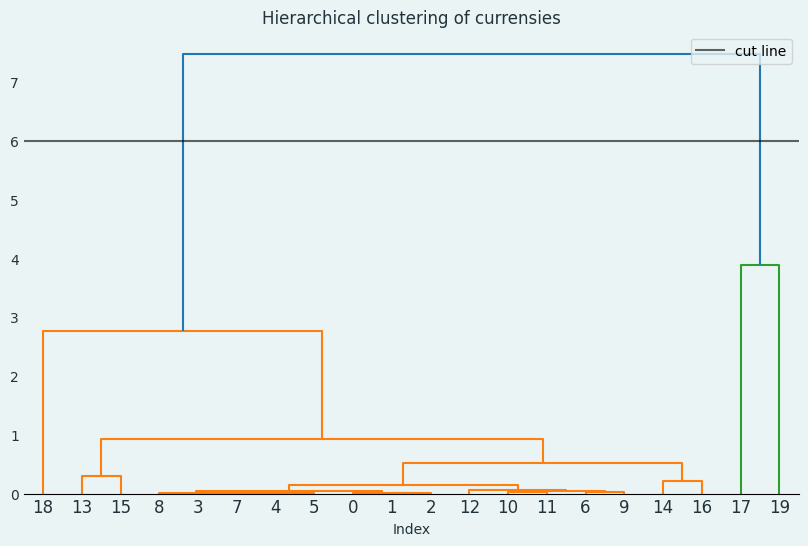

In [74]:
data = StandardScaler().fit_transform(df[['Volume', 'MarketCap']])
result=shc.linkage(data, method='ward')

fig, ax = plt.subplots(figsize=(10, 6))
shc.dendrogram(result)
ax.plot([0,500],[6,6], color='black', label='cut line', alpha=0.6)
ax.set_title("Hierarchical clustering of currensies", fontsize=12, color="#22333b")
ax.set_xlabel("Index", fontsize=10, color="#22333b")
ax.tick_params(axis="both", length=0, labelcolor="#22333b")
ax.set_facecolor("#EAF4f4")
ax.legend(facecolor="#EAF4f4")
fig.set_facecolor("#EAF4f4")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

We have performed clustering using two characteristics: market cap and volume. As depicted in the dendrogram, currencies with similar market cap and volume were initially grouped together in one cluster. Subsequently, clusters that were in close proximity to each other were merged, resulting in higher-level clusters. Additionally, a general clustering pattern can be observed in this dendrogram, where **Tether and Bitcoin** are placed in one cluster, while the remaining currencies are grouped in another cluster due to Tether and Bitcoin significant differences in market cap and volume compared to other currencies.

Given **Ethereum**'s standing as one of the leading currencies in the market, it was anticipated that it would be grouped alongside Bitcoin and Tether. However, the graphs presented in the first phase of the project revealed that Ethereum's volume is slightly lower than that of Bitcoin, while Bitcoin boasts a larger market cap than Ethereum. Conversely, Ethereum's market cap surpasses that of Tether, but its volume is significantly lower compared to Tether. As a result of these disparities, Ethereum is not included in the Bitcoin and Tether cluster.

<h3>Section 2</h3>

The issue at hand is that when encoding the categorical features, their distance from one another is greater than it should be. As a result, these features have a more significant impact on clustering. Although methods such as K-prototypes for clustering mixed data are outlined in this [link](https://medium.com/analytics-vidhya/the-ultimate-guide-for-clustering-mixed-data-1eefa0b4743b), we specifically sought to utilize hierarchical clustering, which prevented us from leveraging these approaches. Consequently, we proceeded with the standard procedure.

In [75]:
data = df[['Volume', 'MarketCap', 'ProofType']]
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(data[['ProofType']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.categories_[0])

data = pd.concat([data, encoded_df], axis=1).drop('ProofType', axis=1)
data = StandardScaler().fit_transform(data)
pd.DataFrame(data).describe()

,0,1,2,3,4,5,6
count,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,20.000000
mean,-2.220446e-17,-6.661338e-17,-3.608225e-17,4.440892e-17,-5.551115e-17,-3.608225e-17,0.000000
std,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978
min,-4.716457e-01,-4.141199e-01,-2.294157e-01,-9.045340e-01,-5.773503e-01,-2.294157e-01,-0.500000
25%,-4.459340e-01,-3.949082e-01,-2.294157e-01,-9.045340e-01,-5.773503e-01,-2.294157e-01,-0.500000
50%,-4.118591e-01,-3.697125e-01,-2.294157e-01,-9.045340e-01,-5.773503e-01,-2.294157e-01,-0.500000
75%,-2.437807e-01,-1.886798e-01,-2.294157e-01,1.105542e+00,0.000000e+00,-2.294157e-01,-0.500000
max,3.448978e+00,3.968780e+00,4.358899e+00,1.105542e+00,1.732051e+00,4.358899e+00,2.000000


Index of currensies with 'PoS' proftype [0, 1, 3, 5, 7, 9, 12, 16, 18]
Index of currensies with 'PoW' proftype [2, 6, 8, 11, 19]
Index of currensies with 'stablecoin' proftype [4, 13, 15, 17]
Index of currensies with 'PoH' proftype [10]
Index of currensies with 'RPCA' proftype [14]


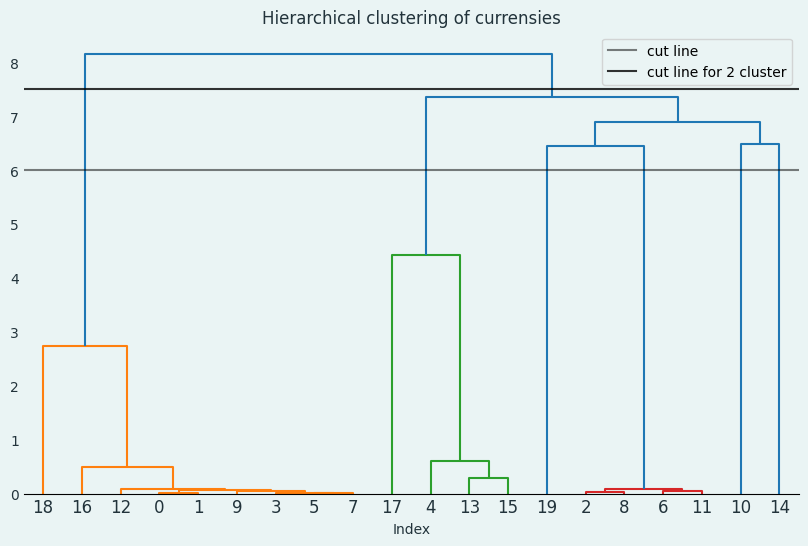

In [76]:
result=shc.linkage(data, method='ward')

fig, ax = plt.subplots(figsize=(10, 6))
shc.dendrogram(result)
ax.plot([0,500],[6,6], color='black', label='cut line', alpha=0.5)
ax.plot([0,500],[7.5,7.5], color='black', label='cut line for 2 cluster', alpha=0.8)
ax.set_title("Hierarchical clustering of currensies", fontsize=12, color="#22333b")
ax.set_xlabel("Index", fontsize=10, color="#22333b")
ax.tick_params(axis="both", length=0, labelcolor="#22333b")
ax.set_facecolor("#EAF4f4")
ax.legend(facecolor="#EAF4f4")
fig.set_facecolor("#EAF4f4")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

PoS = df[df['ProofType'] == 'PoS'].index.to_list()
PoW = df[df['ProofType'] == 'PoW'].index.to_list()
stablecoin = df[df['ProofType'] == 'stablecoin'].index.to_list()
PoH = df[df['ProofType'] == 'PoH'].index.to_list()
RPCA = df[df['ProofType'] == 'RPCA'].index.to_list()
print('Index of currensies with \'PoS\' proftype',PoS)
print('Index of currensies with \'PoW\' proftype',PoW)
print('Index of currensies with \'stablecoin\' proftype',stablecoin)
print('Index of currensies with \'PoH\' proftype',PoH)
print('Index of currensies with \'RPCA\' proftype',RPCA)

We have performed clustering using three features: market cap, volume, and proof type. As observed above, by cutting the dendrogram at the marked black line, we obtain distinct clusters based on **proof type**. **Bitcoin** stands out in a separate cluster due to its substantial differences in market cap and volume compared to other currencies. In the clusters below, currencies with similar market cap and volume are grouped together.

In the division into 2 clusters, it is evident that all the currencies with proof type "PoS" are grouped together in one cluster, while the remaining currencies are placed in the second cluster. In the subsequent branch clusters, currencies are further clustered based on their volume, market cap, and proof type. This indicates an improvement in the clustering process overall, as it takes into account multiple factors for grouping the currencies.

<h3>Section 3</h3>

<h4>adding Network</h4>

In [77]:
data = df[['Volume', 'MarketCap', 'ProofType', 'Network']]
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(data[['ProofType']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.categories_[0])
data = pd.concat([data, encoded_df], axis=1).drop('ProofType', axis=1)

encoded_data = encoder.fit_transform(data[['Network']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.categories_[0])
data = pd.concat([data, encoded_df], axis=1).drop('Network', axis=1)

data = StandardScaler().fit_transform(data)

Index of currensies with 'PoH' proftype [10]
Index of currensies with 'RPCA' proftype [14]
Index of currensies with 'Binance' Network [13, 16]
Index of currensies with 'PoS' proftype and 'Ethereum' Network [0, 1, 5, 18]
Index of currensies with 'PoW' proftype and 'Ethereum' Network [2]
Index of currensies with 'stablecoin' proftype and 'Ethereum' Network [4, 15, 17]
Index of currensies with 'PoS' proftype and Network != 'Ethereum' [3, 7, 9, 12, 16]
Index of currensies with 'PoW' proftype and Network != 'Ethereum' [6, 8, 11, 19]


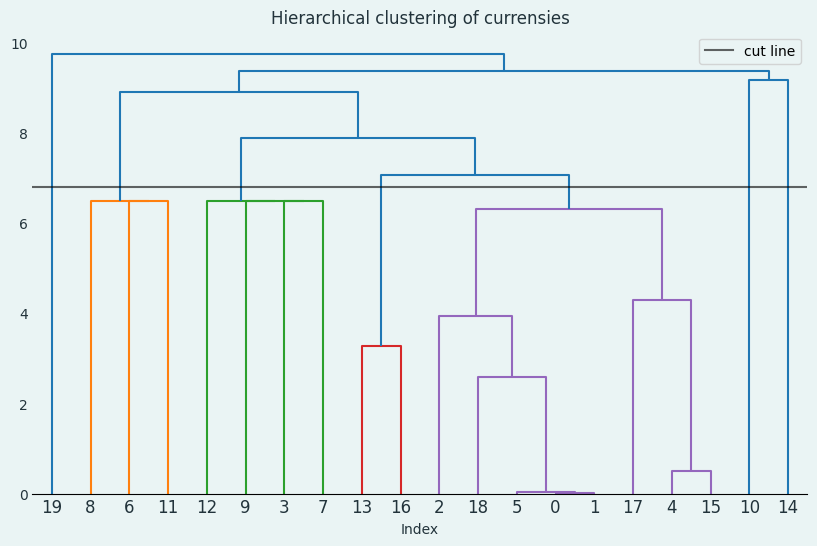

In [78]:
result=shc.linkage(data, method='ward')

fig, ax = plt.subplots(figsize=(10, 6))
shc.dendrogram(result)
ax.plot([0,500],[6.8,6.8], color='black', label='cut line', alpha=0.6)
ax.set_title("Hierarchical clustering of currensies", fontsize=12, color="#22333b")
ax.set_xlabel("Index", fontsize=10, color="#22333b")
ax.tick_params(axis="both", length=0, labelcolor="#22333b")
ax.set_facecolor("#EAF4f4")
ax.legend(facecolor="#EAF4f4")
fig.set_facecolor("#EAF4f4")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
df.head(20)

PoH = df[df['ProofType'] == 'PoH'].index.to_list()
RPCA = df[df['ProofType'] == 'RPCA'].index.to_list()
print('Index of currensies with \'PoH\' proftype',PoH)
print('Index of currensies with \'RPCA\' proftype',RPCA)

Binance = df[df['Network'] == 'Binance Smart Chain'].index.to_list()
print('Index of currensies with \'Binance\' Network',Binance)

Ethereum_Pos = df[(df['Network'] == 'Ethereum') & (df['ProofType'] == 'PoS')].index.to_list()
NotEthereum_Pos = df[(df['Network'] != 'Ethereum') & (df['ProofType'] == 'PoS')].index.to_list()
Ethereum_PoW = df[(df['Network'] == 'Ethereum') & (df['ProofType'] == 'PoW')].index.to_list()
NotEthereum_PoW = df[(df['Network'] != 'Ethereum') & (df['ProofType'] == 'PoW')].index.to_list()
Ethereum_Stable = df[(df['Network'] == 'Ethereum') & (df['ProofType'] == 'stablecoin')].index.to_list()
print('Index of currensies with \'PoS\' proftype and \'Ethereum\' Network',Ethereum_Pos)
print('Index of currensies with \'PoW\' proftype and \'Ethereum\' Network',Ethereum_PoW)
print('Index of currensies with \'stablecoin\' proftype and \'Ethereum\' Network',Ethereum_Stable)
print('Index of currensies with \'PoS\' proftype and Network != \'Ethereum\'',NotEthereum_Pos)
print('Index of currensies with \'PoW\' proftype and Network != \'Ethereum\'',NotEthereum_PoW)

By incorporating network feature into the clustering analysis, we can observe an improved clustering solution. If we divide the dendrogram with the black line, we can identify well-defined clusters in terms of both network structure and proof type.

Furthermore, the influence of volume and market capitalization is also evident in this clustering.<br>
For instance, Bitcoin is separated from other similar currencies due to its high volume and market capitalization. In the branch clusters, we can see that currencies are assigned to different clusters based on their difference in volume and market cap.

<h4>adding GenesisYear</h4>

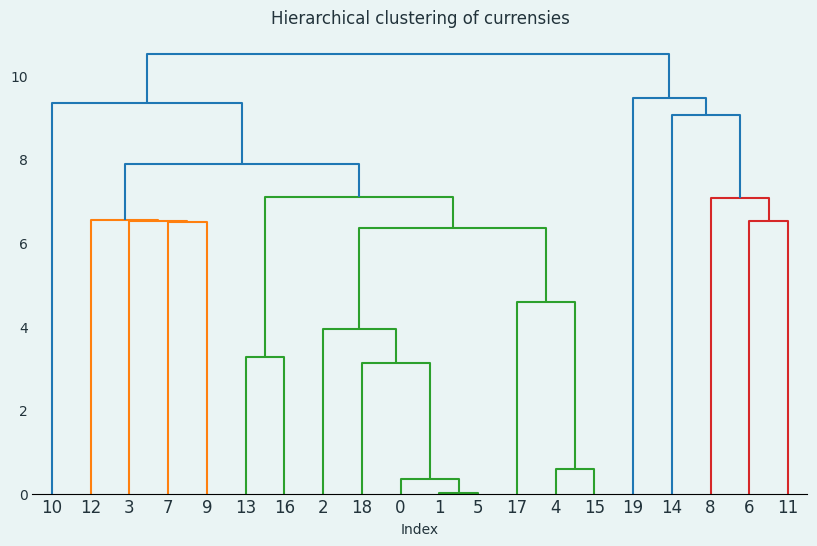

In [79]:
data = df[['Volume', 'MarketCap', 'GenesisYear', 'ProofType', 'Network']]
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(data[['ProofType']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.categories_[0])
data = pd.concat([data, encoded_df], axis=1).drop('ProofType', axis=1)

encoded_data = encoder.fit_transform(data[['Network']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.categories_[0])
data = pd.concat([data, encoded_df], axis=1).drop('Network', axis=1)

data = StandardScaler().fit_transform(data)

result=shc.linkage(data, method='ward')

fig, ax = plt.subplots(figsize=(10, 6))
shc.dendrogram(result)
ax.set_title("Hierarchical clustering of currensies", fontsize=12, color="#22333b")
ax.set_xlabel("Index", fontsize=10, color="#22333b")
ax.tick_params(axis="both", length=0, labelcolor="#22333b")
ax.set_facecolor("#EAF4f4")
fig.set_facecolor("#EAF4f4")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

With the addition of the "GenesisYear" feature, the dendrogram now exhibits a more meaningful structure, indicating that the currencies within each cluster are more similar to each other compared to the previous case. As anticipated, the inclusion of new features has provided additional information for clustering. 

Moreover, it is noteworthy that the influence of the "volume" and "market cap" features has decreased compared to the initial case. This suggests that the clustering now takes into account not only these factors but also other features. Consequently, the resulting clusters are likely to reflect more comprehensive similarities and differences among the currencies.